# Required imports:

In [1]:
# It is a quick stackoverflow fix to import gensim
import smart_open 
smart_open.open = smart_open.smart_open

In [64]:
import pandas as pd
import numpy as np 
import random 
from tqdm import tqdm
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Fetching the JSON dataset:

In [3]:
import json

with open('customer_dataset.json') as data_file:
    data = json.load(data_file)
data

{'results': [{'email': 'abernhard@grimes.info',
   'products': [{'product_name': 'How to Earn Money',
     'url_slug': 'earnmoney',
     'product_id': 7},
    {'product_name': 'The maze runner',
     'url_slug': 'TheMazeRunner',
     'product_id': 24},
    {'product_name': 'MSI gaming PC', 'url_slug': 'MSI', 'product_id': 38},
    {'product_name': 'Redmi Airdots', 'url_slug': 'airdots', 'product_id': 13},
    {'product_name': 'Asus TUF 505 DT',
     'url_slug': 'asustuf',
     'product_id': 35},
    {'product_name': 'padelux ultra premium',
     'url_slug': 'padelux',
     'product_id': 55},
    {'product_name': 'faded cowboy jeans',
     'url_slug': 'jeans',
     'product_id': 62},
    {'product_name': 'Room Cooler 1200W',
     'url_slug': 'room_cooler_200w',
     'product_id': 48},
    {'product_name': 'blackhorse shoes',
     'url_slug': 'blackshorse',
     'product_id': 58},
    {'product_name': 'England Jersey Home',
     'url_slug': 'englandjersey',
     'product_id': 66},
    {'

In [4]:
purchase_list = []

for i in data.items(): 
    print(i[1][:])
    purchase_list.append(i[1][:])

[{'email': 'abernhard@grimes.info', 'products': [{'product_name': 'How to Earn Money', 'url_slug': 'earnmoney', 'product_id': 7}, {'product_name': 'The maze runner', 'url_slug': 'TheMazeRunner', 'product_id': 24}, {'product_name': 'MSI gaming PC', 'url_slug': 'MSI', 'product_id': 38}, {'product_name': 'Redmi Airdots', 'url_slug': 'airdots', 'product_id': 13}, {'product_name': 'Asus TUF 505 DT', 'url_slug': 'asustuf', 'product_id': 35}, {'product_name': 'padelux ultra premium', 'url_slug': 'padelux', 'product_id': 55}, {'product_name': 'faded cowboy jeans', 'url_slug': 'jeans', 'product_id': 62}, {'product_name': 'Room Cooler 1200W', 'url_slug': 'room_cooler_200w', 'product_id': 48}, {'product_name': 'blackhorse shoes', 'url_slug': 'blackshorse', 'product_id': 58}, {'product_name': 'England Jersey Home', 'url_slug': 'englandjersey', 'product_id': 66}, {'product_name': 'Reebok Bat', 'url_slug': 'bat', 'product_id': 68}, {'product_name': 'Pressure Cooker', 'url_slug': '8764', 'product_id'

In [5]:
purchase_list

[[{'email': 'abernhard@grimes.info',
   'products': [{'product_name': 'How to Earn Money',
     'url_slug': 'earnmoney',
     'product_id': 7},
    {'product_name': 'The maze runner',
     'url_slug': 'TheMazeRunner',
     'product_id': 24},
    {'product_name': 'MSI gaming PC', 'url_slug': 'MSI', 'product_id': 38},
    {'product_name': 'Redmi Airdots', 'url_slug': 'airdots', 'product_id': 13},
    {'product_name': 'Asus TUF 505 DT',
     'url_slug': 'asustuf',
     'product_id': 35},
    {'product_name': 'padelux ultra premium',
     'url_slug': 'padelux',
     'product_id': 55},
    {'product_name': 'faded cowboy jeans',
     'url_slug': 'jeans',
     'product_id': 62},
    {'product_name': 'Room Cooler 1200W',
     'url_slug': 'room_cooler_200w',
     'product_id': 48},
    {'product_name': 'blackhorse shoes',
     'url_slug': 'blackshorse',
     'product_id': 58},
    {'product_name': 'England Jersey Home',
     'url_slug': 'englandjersey',
     'product_id': 66},
    {'product_nam

In [6]:
purchase_list[0]

[{'email': 'abernhard@grimes.info',
  'products': [{'product_name': 'How to Earn Money',
    'url_slug': 'earnmoney',
    'product_id': 7},
   {'product_name': 'The maze runner',
    'url_slug': 'TheMazeRunner',
    'product_id': 24},
   {'product_name': 'MSI gaming PC', 'url_slug': 'MSI', 'product_id': 38},
   {'product_name': 'Redmi Airdots', 'url_slug': 'airdots', 'product_id': 13},
   {'product_name': 'Asus TUF 505 DT',
    'url_slug': 'asustuf',
    'product_id': 35},
   {'product_name': 'padelux ultra premium',
    'url_slug': 'padelux',
    'product_id': 55},
   {'product_name': 'faded cowboy jeans',
    'url_slug': 'jeans',
    'product_id': 62},
   {'product_name': 'Room Cooler 1200W',
    'url_slug': 'room_cooler_200w',
    'product_id': 48},
   {'product_name': 'blackhorse shoes',
    'url_slug': 'blackshorse',
    'product_id': 58},
   {'product_name': 'England Jersey Home',
    'url_slug': 'englandjersey',
    'product_id': 66},
   {'product_name': 'Reebok Bat', 'url_slug'

In [7]:
purchase_json = json.dumps(purchase_list[0])

In [8]:
purchase_json

'[{"email": "abernhard@grimes.info", "products": [{"product_name": "How to Earn Money", "url_slug": "earnmoney", "product_id": 7}, {"product_name": "The maze runner", "url_slug": "TheMazeRunner", "product_id": 24}, {"product_name": "MSI gaming PC", "url_slug": "MSI", "product_id": 38}, {"product_name": "Redmi Airdots", "url_slug": "airdots", "product_id": 13}, {"product_name": "Asus TUF 505 DT", "url_slug": "asustuf", "product_id": 35}, {"product_name": "padelux ultra premium", "url_slug": "padelux", "product_id": 55}, {"product_name": "faded cowboy jeans", "url_slug": "jeans", "product_id": 62}, {"product_name": "Room Cooler 1200W", "url_slug": "room_cooler_200w", "product_id": 48}, {"product_name": "blackhorse shoes", "url_slug": "blackshorse", "product_id": 58}, {"product_name": "England Jersey Home", "url_slug": "englandjersey", "product_id": 66}, {"product_name": "Reebok Bat", "url_slug": "bat", "product_id": 68}, {"product_name": "Pressure Cooker", "url_slug": "8764", "product_id

In [9]:
df = pd.read_json(purchase_json)

In [10]:
df

,email,products
0,abernhard@grimes.info,"[{'product_name': 'How to Earn Money', 'url_sl..."
1,adarshadon@gmail.com,"[{'product_name': 'Dell Inspiron 1400', 'url_s..."
2,alf.torphy@hotmail.com,"[{'product_name': 'Chicken Pizza', 'url_slug':..."
3,alisa55@gmail.com,"[{'product_name': 'Optical Mouse', 'url_slug':..."
4,amira57@cassin.org,"[{'product_name': 'Aqua Hand Band', 'url_slug'..."
5,anderson78@yahoo.com,"[{'product_name': '48 laws of power', 'url_slu..."
6,ashish.thapa477@gmail.com,"[{'product_name': 'Chopping Board', 'url_slug'..."
7,ayushdon@gmail.com,"[{'product_name': 'Redmi Airdots', 'url_slug':..."
8,bruce69@gmail.com,"[{'product_name': 'whisper ultra', 'url_slug':..."
9,carrie39@hand.com,"[{'product_name': 'Alumunium Foil', 'url_slug'..."


In [11]:
df['products'][1]

[{'product_name': 'Dell Inspiron 1400',
  'url_slug': 'dell_inspiron_1400',
  'product_id': 15},
 {'product_name': 'Aqua Hand Band',
  'url_slug': 'aqua_hand_band',
  'product_id': 17},
 {'product_name': 'Floyd rose 24 fret.',
  'url_slug': 'floydrose24',
  'product_id': 21},
 {'product_name': 'Adidas Socks', 'url_slug': 'adi-socks', 'product_id': 25},
 {'product_name': 'Fantech mechanical Keyboard with RGB lights.',
  'url_slug': 'mechanicalKeyboard',
  'product_id': 31},
 {'product_name': 'Keyboard Cover',
  'url_slug': 'KeyboardCover',
  'product_id': 34},
 {'product_name': 'diper', 'url_slug': 'hsi', 'product_id': 45},
 {'product_name': 'airpod pro', 'url_slug': 'airpod', 'product_id': 53}]

# Cleaning and normalizing the dataframe:

In [12]:
df = df.explode('products')
df

,email,products
0,abernhard@grimes.info,"{'product_name': 'How to Earn Money', 'url_slu..."
0,abernhard@grimes.info,"{'product_name': 'The maze runner', 'url_slug'..."
0,abernhard@grimes.info,"{'product_name': 'MSI gaming PC', 'url_slug': ..."
0,abernhard@grimes.info,"{'product_name': 'Redmi Airdots', 'url_slug': ..."
0,abernhard@grimes.info,"{'product_name': 'Asus TUF 505 DT', 'url_slug'..."
...,...,...
57,zdenesik@harris.com,"{'product_name': 'Alumunium Foil', 'url_slug':..."
57,zdenesik@harris.com,"{'product_name': 'Adidas Socks', 'url_slug': '..."
57,zdenesik@harris.com,"{'product_name': 'Mettalica Black T-shirt', 'u..."
57,zdenesik@harris.com,"{'product_name': 'Keyboard Cover', 'url_slug':..."


In [13]:

json_struct = json.loads(df.to_json(orient="records"))    
df_flat = pd.io.json.json_normalize(json_struct)

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [14]:
df_flat

,email,products.product_name,products.url_slug,products.product_id
0,abernhard@grimes.info,How to Earn Money,earnmoney,7
1,abernhard@grimes.info,The maze runner,TheMazeRunner,24
2,abernhard@grimes.info,MSI gaming PC,MSI,38
3,abernhard@grimes.info,Redmi Airdots,airdots,13
4,abernhard@grimes.info,Asus TUF 505 DT,asustuf,35
...,...,...,...,...
1914,zdenesik@harris.com,Alumunium Foil,aluminum,4
1915,zdenesik@harris.com,Adidas Socks,adi-socks,25
1916,zdenesik@harris.com,Mettalica Black T-shirt,Mettalicablack,59
1917,zdenesik@harris.com,Keyboard Cover,KeyboardCover,34


In [15]:
df_flat = df_flat.rename(columns={'products.product_name' : 'product_name', 'products.url_slug' : 'url_slug', 'products.product_id' : 'product_id'})
df_flat

,email,product_name,url_slug,product_id
0,abernhard@grimes.info,How to Earn Money,earnmoney,7
1,abernhard@grimes.info,The maze runner,TheMazeRunner,24
2,abernhard@grimes.info,MSI gaming PC,MSI,38
3,abernhard@grimes.info,Redmi Airdots,airdots,13
4,abernhard@grimes.info,Asus TUF 505 DT,asustuf,35
...,...,...,...,...
1914,zdenesik@harris.com,Alumunium Foil,aluminum,4
1915,zdenesik@harris.com,Adidas Socks,adi-socks,25
1916,zdenesik@harris.com,Mettalica Black T-shirt,Mettalicablack,59
1917,zdenesik@harris.com,Keyboard Cover,KeyboardCover,34


In [16]:
df_flat = df_flat[df_flat['product_id'].notna()]
df_flat

,email,product_name,url_slug,product_id
0,abernhard@grimes.info,How to Earn Money,earnmoney,7
1,abernhard@grimes.info,The maze runner,TheMazeRunner,24
2,abernhard@grimes.info,MSI gaming PC,MSI,38
3,abernhard@grimes.info,Redmi Airdots,airdots,13
4,abernhard@grimes.info,Asus TUF 505 DT,asustuf,35
...,...,...,...,...
1914,zdenesik@harris.com,Alumunium Foil,aluminum,4
1915,zdenesik@harris.com,Adidas Socks,adi-socks,25
1916,zdenesik@harris.com,Mettalica Black T-shirt,Mettalicablack,59
1917,zdenesik@harris.com,Keyboard Cover,KeyboardCover,34


# Making the train value

In [17]:
df_flat['product_name'] = df_flat['product_name'].astype(str)
df_flat['email'] = df_flat['email'].astype(str)

In [18]:
customers = df_flat['email'].unique().tolist()
customers

['abernhard@grimes.info',
 'adarshadon@gmail.com',
 'alf.torphy@hotmail.com',
 'alisa55@gmail.com',
 'amira57@cassin.org',
 'anderson78@yahoo.com',
 'ashish.thapa477@gmail.com',
 'ayushdon@gmail.com',
 'bruce69@gmail.com',
 'carrie39@hand.com',
 'cody94@larkin.com',
 'devan36@hotmail.com',
 'dhakal.diwash@ghale.com',
 'dkilback@hotmail.com',
 'elliott53@yahoo.com',
 'elvis.nitzsche@gmail.com',
 'emmanuelle10@yahoo.com',
 'fanny.hand@gmail.com',
 'fjacobi@schmeler.com',
 'ford.fay@hotmail.com',
 'gibson.irwin@gmail.com',
 'goodwin.joshuah@oconnell.com',
 'graham15@keeling.com',
 'hjaskolski@wisoky.com',
 'hrosenbaum@yahoo.com',
 'huel.ellie@runolfsson.com',
 'iwilkinson@okuneva.com',
 'jenifer26@yahoo.com',
 'jerrold.dach@gmail.com',
 'justus00@yahoo.com',
 'kconsidine@hotmail.com',
 'kenyon80@gmail.com',
 'khadka.sarmila@nepal.com.np',
 'kulas.filomena@oberbrunner.org',
 'lgrimes@yahoo.com',
 'lind.uriel@king.com',
 'madie.bailey@kertzmann.net',
 'makayla.monahan@ryan.com',
 'marcel.fe

In [19]:
random.shuffle(customers)
c_train = [customers[i] for i in range(round(len(customers)))]
c_train

['alisa55@gmail.com',
 'hrosenbaum@yahoo.com',
 'stuart.grady@yahoo.com',
 'graham15@keeling.com',
 'gibson.irwin@gmail.com',
 'toni44@hotmail.com',
 'virginie78@hayes.com',
 'abernhard@grimes.info',
 'emmanuelle10@yahoo.com',
 'carrie39@hand.com',
 'cody94@larkin.com',
 'ashish.thapa477@gmail.com',
 'fanny.hand@gmail.com',
 'makayla.monahan@ryan.com',
 'roshan80@bastakoti.net.np',
 'elvis.nitzsche@gmail.com',
 'alf.torphy@hotmail.com',
 'ford.fay@hotmail.com',
 'amira57@cassin.org',
 'elliott53@yahoo.com',
 'xbaidya@upadhyaya.com',
 'dhakal.diwash@ghale.com',
 'marcel.ferry@runolfsdottir.biz',
 'porter62@hudson.com',
 'micaela15@kihn.com',
 'tavares.casper@gmail.com',
 'ustrosin@gmail.com',
 'sujitdon@gmail.com',
 'ayushdon@gmail.com',
 'zdenesik@harris.com',
 'huel.ellie@runolfsson.com',
 'khadka.sarmila@nepal.com.np',
 'justus00@yahoo.com',
 'wadams@gmail.com',
 'myrl.beer@bode.org',
 'jenifer26@yahoo.com',
 'goodwin.joshuah@oconnell.com',
 'ymertz@hessel.com',
 'travon54@cassin.com

In [20]:
train_df = df_flat[df_flat['email'].isin(c_train)]
#validation_df = df[~df_flat['email'].isin(c_train)]

In [21]:
train_df[train_df["email"] == 'toni44@hotmail.com']["product_name"].tolist()

['Alumunium Foil',
 'MacBook pro 16',
 'Madmax Furry Road',
 'samsung earphone',
 'faded cowboy jeans',
 'England Jersey Home',
 'Stainless Steel Knife',
 'Asus TUF 505 DT',
 'nitro 5',
 'Gibson Les Paul Standard Cherry Sunburst',
 'Alumunium Foil',
 'How to Earn Money',
 'Floyd rose 24 fret.',
 '48 laws of power',
 'Fantech mechanical Keyboard with RGB lights.',
 'Pressure Cooker',
 'How to Earn Money',
 'Multi-Use Baby Receiving Blanket / Bath Towel',
 'The art of war',
 '48 laws of power',
 'Keyboard Cover',
 'diper',
 'pampers diaper',
 'Born Rich',
 'blackhorse shoes',
 'Fantech mechanical Keyboard with RGB lights.',
 'Chicken Momo',
 'Optical Mouse',
 'Multi-Use Baby Receiving Blanket / Bath Towel',
 'MSI gaming PC',
 'Madmax Furry Road',
 'Desperate Rookie',
 'Gibson Les Paul Standard Cherry Sunburst',
 'England Jersey Home',
 'Alumunium Foil',
 'Dell Inspiron 1400',
 'thomas calculus',
 'Keyboard Cover',
 'Reebok Bat',
 '1984',
 'The maze runner',
 'Chicken Pizza',
 'faded cowb

In [22]:
# list to capture purchase history of the customers
p_train = []

# populate the list with the product codes
for i in tqdm(c_train):
    temp = train_df[train_df["email"] == i]["product_name"].tolist()
    p_train.append(temp)

100%|██████████| 58/58 [00:00<00:00, 746.22it/s]


In [23]:
p_train

[['Optical Mouse',
  'WIFI adopter',
  'Room Cooler 1200W',
  'Aqua Hand Band',
  'whisper ultra',
  'Pearl export EXX',
  'Adidas Jabulani ball',
  'Adidas Socks',
  'Desperate Rookie',
  'samsung earphone',
  'Ghumne mech maathi andho manche',
  'Shangrila Magic Buddha Printed T-Shirt For Men',
  'Durex Mutual Climax',
  'Multi-Use Baby Receiving Blanket / Bath Towel',
  'Keyboard Cover',
  'Lenovo gaming PC',
  'Ghumne mech maathi andho manche',
  'Stainless Steel Knife',
  'shikhar shoes',
  'Multi-Use Baby Receiving Blanket / Bath Towel',
  'whisper ultra',
  'thomas calculus',
  'Razer Blade 15',
  'Huawei Watch 8',
  'Gibson Les Paul Standard Cherry Sunburst',
  'How to Earn Money',
  'baltra400',
  'lightshaber',
  'blackhorse shoes',
  'Pearl export EXX',
  'Chopping Board',
  'Mobile Cover',
  'Chicken Pizza',
  'blackhorse shoes',
  'Nike water bottle',
  'Aqua Hand Band',
  'Keyboard Cover',
  'Razer Blade 15',
  'gf63',
  'diper',
  'lightshaber'],
 ['Multi-Use Baby Receiv

In [24]:
#validation_df

In [25]:
# # list to capture purchase history of the customers
# p_val = []

# # populate the list with the product codes
# for i in tqdm(validation_df['email'].unique()):
#     temp = validation_df[validation_df["email"] == i]["product_name"].tolist()
#     p_val.append(temp)

In [26]:
# p_val

# Making the neural network and training the data:

In [27]:
model = Word2Vec(window = 3, min_count=1)

In [28]:
model.build_vocab(p_train, progress_per=200)

In [29]:
model.corpus_count 

58

In [30]:
model.train(p_train, total_examples = model.corpus_count, 
            epochs=7)

(4234, 13433)

# Saving the trained model:

In [31]:
model.save("./dummy_model.model")

In [32]:
print(model)

Word2Vec(vocab=67, size=100, alpha=0.025)


In [33]:
model.init_sims(replace=True) # This makes model more memory efficient

In [34]:
model.save("./dummy_model_lite.model")

# Embeeding obtained in a vector:

In [38]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(67, 100)

In [39]:
X

array([[-0.10973815, -0.05830354,  0.04839475, ..., -0.153497  ,
        -0.06330217, -0.12852208],
       [-0.09575358, -0.09558545,  0.07355981, ..., -0.15854573,
         0.00576127, -0.17174543],
       [-0.17540221, -0.09825682,  0.12985203, ..., -0.15176223,
         0.01510588, -0.20685457],
       ...,
       [-0.04624081, -0.11884501,  0.00266812, ..., -0.10605466,
        -0.08210751, -0.17078334],
       [-0.07916786, -0.07809378, -0.01225311, ..., -0.0290829 ,
         0.0703913 , -0.21971221],
       [-0.15540014, -0.04764792,  0.06903671, ...,  0.14121105,
         0.0124654 , -0.1346529 ]], dtype=float32)

# Visualizing Word Vectors with t-SNE:

In [66]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


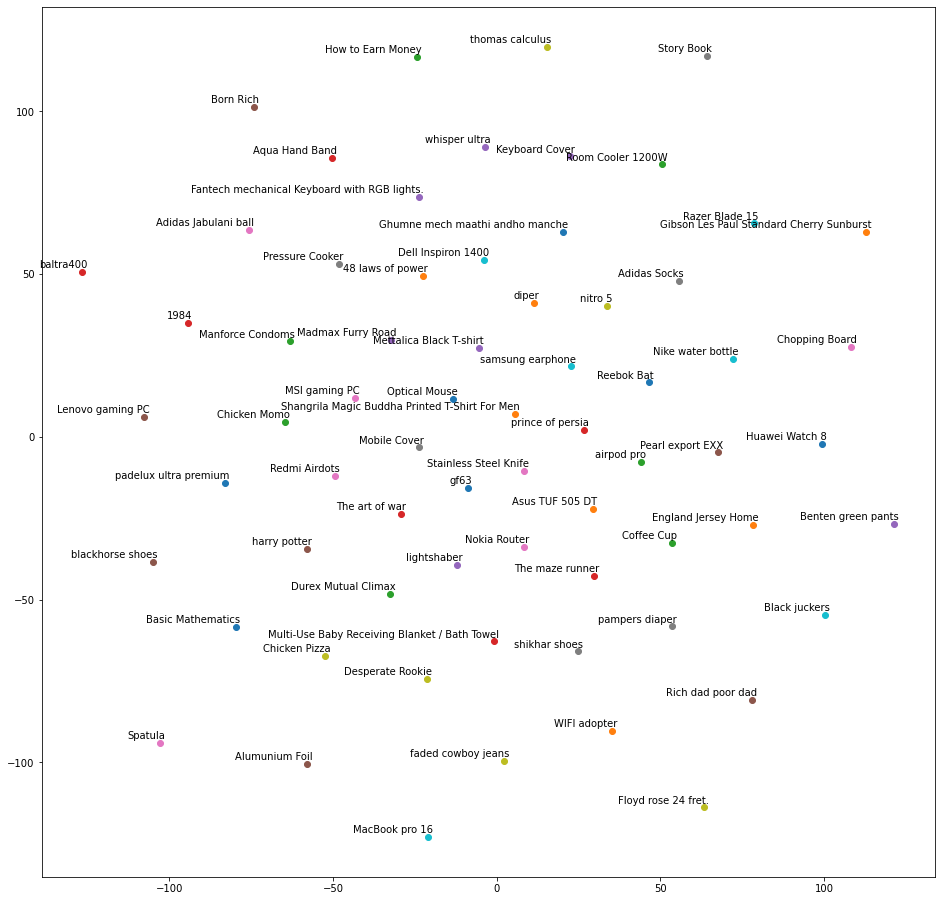

In [67]:
tsne_plot(model)

#  Listing products for comparing output:

In [40]:
products = train_df[["product_name", "product_id"]]
products

,product_name,product_id
0,How to Earn Money,7
1,The maze runner,24
2,MSI gaming PC,38
3,Redmi Airdots,13
4,Asus TUF 505 DT,35
...,...,...
1914,Alumunium Foil,4
1915,Adidas Socks,25
1916,Mettalica Black T-shirt,59
1917,Keyboard Cover,34


In [41]:
# remove duplicates
products.drop_duplicates(inplace=True)
products.head(50)

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,product_name,product_id
0,How to Earn Money,7
1,The maze runner,24
2,MSI gaming PC,38
3,Redmi Airdots,13
4,Asus TUF 505 DT,35
5,padelux ultra premium,55
6,faded cowboy jeans,62
7,Room Cooler 1200W,48
8,blackhorse shoes,58
9,England Jersey Home,66


In [42]:
products_dict = products.groupby('product_name')['product_name'].apply(list).to_dict()

# Function to obtain all the similar products from the similarity vector:

In [43]:
def similar_products(v, n = 30):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [44]:
similar_products(model['Fantech mechanical Keyboard with RGB lights.'])

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.


[('Ghumne mech maathi andho manche', 0.8426297307014465),
 ('nitro 5', 0.8221204876899719),
 ('Shangrila Magic Buddha Printed T-Shirt For Men', 0.8212758898735046),
 ('Optical Mouse', 0.8153824806213379),
 ('Dell Inspiron 1400', 0.8131306171417236),
 ('Mettalica Black T-shirt', 0.8106285333633423),
 ('The art of war', 0.8074551820755005),
 ('prince of persia', 0.8051435947418213),
 ('samsung earphone', 0.8026599884033203),
 ('Stainless Steel Knife', 0.7983578443527222),
 ('MSI gaming PC', 0.7922192811965942),
 ('harry potter', 0.7920882105827332),
 ('Desperate Rookie', 0.7919593453407288),
 ('lightshaber', 0.7912988662719727),
 ('Lenovo gaming PC', 0.7905192375183105),
 ('Asus TUF 505 DT', 0.7898260354995728),
 ('48 laws of power', 0.7887653112411499),
 ('Chicken Momo', 0.7858777642250061),
 ('padelux ultra premium', 0.7854980826377869),
 ('Mobile Cover', 0.7830907106399536),
 ('Aqua Hand Band', 0.7815966606140137),
 ('Madmax Furry Road', 0.779129683971405),
 ('diper', 0.77742266654968

### Function to average all the vectors of the products the user has bought so far and use the resultant to find similar products:

In [45]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [46]:
p_val = ['Optical Mouse', 'samsung earphone', 'Huawei Watch 8', 'Fantech mechanical Keyboard with RGB lights.']

In [47]:
aggregate_vectors(p_val).shape

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(100,)

In [48]:
similar_prod = similar_products(aggregate_vectors(p_val))

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.


In [49]:
similar_prod

[('samsung earphone', 0.9199813604354858),
 ('Fantech mechanical Keyboard with RGB lights.', 0.9086732268333435),
 ('Shangrila Magic Buddha Printed T-Shirt For Men', 0.9024156928062439),
 ('prince of persia', 0.901090681552887),
 ('Stainless Steel Knife', 0.8965118527412415),
 ('nitro 5', 0.8954486846923828),
 ('Asus TUF 505 DT', 0.8939775824546814),
 ('Ghumne mech maathi andho manche', 0.8920482993125916),
 ('Mettalica Black T-shirt', 0.889670729637146),
 ('gf63', 0.8868837356567383),
 ('Dell Inspiron 1400', 0.8847676515579224),
 ('The art of war', 0.880302906036377),
 ('Reebok Bat', 0.8783868551254272),
 ('Mobile Cover', 0.8783384561538696),
 ('Desperate Rookie', 0.8757628202438354),
 ('Huawei Watch 8', 0.8730834722518921),
 ('Chicken Momo', 0.8699015378952026),
 ('48 laws of power', 0.8675161004066467),
 ('Nokia Router', 0.8655786514282227),
 ('The maze runner', 0.8639881014823914),
 ('harry potter', 0.8628555536270142),
 ('diper', 0.8617477416992188),
 ('Madmax Furry Road', 0.85888

## Filtering all the products that user has already bought:

In [61]:
def filter_same_products(similar_prod, p_val):
    for prod in p_val:
        for similar in similar_prod:
             if similar[0] == prod:
                    similar_prod.remove(similar)
    return similar_prod

In [62]:
filtered = filter_same_products(similar_prod,  p_val)

In [63]:
filtered[:10]

[('Shangrila Magic Buddha Printed T-Shirt For Men', 0.9024156928062439),
 ('prince of persia', 0.901090681552887),
 ('Stainless Steel Knife', 0.8965118527412415),
 ('nitro 5', 0.8954486846923828),
 ('Asus TUF 505 DT', 0.8939775824546814),
 ('Ghumne mech maathi andho manche', 0.8920482993125916),
 ('Mettalica Black T-shirt', 0.889670729637146),
 ('gf63', 0.8868837356567383),
 ('Dell Inspiron 1400', 0.8847676515579224),
 ('The art of war', 0.880302906036377)]